분석!

In [188]:
import pandas as pd
import numpy as np
data=pd.read_csv('C:/Users/momo8/바탕 화면/공모전/사과 당도 및 기후.csv', encoding='cp949')

In [189]:
#eda
A_Q1 = data['당도'].quantile(0.25)#1분위수
A_Q2 = data['당도'].quantile(0.50)#2분위수(중앙값)
A_Q3 = data['당도'].quantile(0.75)
A_Q4 = data['당도'].quantile(1)

def q(df):
    if df['당도']<A_Q1:
        d=0
    elif df['당도']<A_Q2:
        d=0
    elif df['당도']<A_Q3:
        d=1
    else:
        d=1
    return d
data['당도_범주']=data.apply(q,axis=1)
data=data[['당도_범주','6월 평균 기온', '8월 평균 기온', '5월 강수량', '10월 일교차', '3월 일교차', '9월 강수량','8월 일교차']]#평균기온, 강수량 일교차를 넣어보자
data.head()

,당도_범주,6월 평균 기온,8월 평균 기온,5월 강수량,10월 일교차,3월 일교차,9월 강수량,8월 일교차
0,1,21.7,25.5,44.0,10.6,11.9,40.0,8.6
1,1,22.4,27.1,101.5,8.4,11.1,141.0,8.5
2,1,21.7,25.8,81.5,9.7,11.4,99.0,7.7
3,0,22.4,25.1,32.2,11.8,13.6,62.4,8.3
4,1,21.7,24.3,18.0,14.0,15.2,24.5,8.7


In [190]:
X=data[['6월 평균 기온', '8월 평균 기온', '5월 강수량', '10월 일교차', '3월 일교차', '9월 강수량','8월 일교차']]
df_check=X.isnull().any().any()
y1=data[['당도_범주']]
X=X.apply(pd.to_numeric)
y1=y1.apply(pd.to_numeric) #일단 숫자형으로 바꾸기
df_check

False

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y1, test_size=0.3, random_state=42)

#의사결정나무

In [153]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)
tree.fit(X_train, y_train)
pred_train=tree.predict(X_test)
tree.score(X_test, y_test)

0.3333333333333333

In [154]:
print("특성 중요도:\n{}".format(tree.feature_importances_)) #1월,3월,7월,8월 기온 10월 강수량, 일교차는 안중요한듯?

특성 중요도:
[0.         0.         0.         0.         0.         0.31900516
 0.         0.05165289 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.08116883
 0.         0.         0.         0.         0.         0.
 0.54817312 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


그리드서치해보기

In [155]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth': range(2,20,2), 'min_samples_leaf': range(1,50,2)}
from sklearn.tree import DecisionTreeClassifier
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 50, 2)},
             return_train_score=True)

In [156]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'max_depth': 2, 'min_samples_leaf': 7}


In [157]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.680


In [158]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.667


In [159]:
result_grid=pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010148,0.006484,0.006971,0.003256,2,1,"{'max_depth': 2, 'min_samples_leaf': 1}",0.6,0.4,0.2,...,0.44,0.149666,215,0.85,0.90,1.00,0.90,0.90,0.91,0.04899
1,0.006365,0.001909,0.001854,0.002307,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.6,0.4,0.4,...,0.48,0.097980,204,0.85,0.90,0.90,0.90,0.90,0.89,0.02000
2,0.008648,0.005142,0.003736,0.003551,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.8,0.6,0.4,...,0.60,0.126491,192,0.80,0.80,0.85,0.80,0.80,0.81,0.02000
3,0.006141,0.003294,0.003811,0.003298,2,7,"{'max_depth': 2, 'min_samples_leaf': 7}",0.8,0.8,0.4,...,0.68,0.160000,1,0.75,0.75,0.85,0.80,0.75,0.78,0.04000
4,0.011310,0.002144,0.004820,0.000510,2,9,"{'max_depth': 2, 'min_samples_leaf': 9}",0.0,0.6,0.4,...,0.36,0.320000,220,0.70,0.70,0.80,0.70,0.75,0.73,0.04000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.005304,0.003147,0.006028,0.003594,18,41,"{'max_depth': 18, 'min_samples_leaf': 41}",0.6,0.6,0.6,...,0.64,0.080000,10,0.65,0.65,0.65,0.65,0.60,0.64,0.02000
221,0.007997,0.000492,0.003540,0.003018,18,43,"{'max_depth': 18, 'min_samples_leaf': 43}",0.6,0.6,0.6,...,0.64,0.080000,10,0.65,0.65,0.65,0.65,0.60,0.64,0.02000
222,0.007391,0.001514,0.002067,0.001927,18,45,"{'max_depth': 18, 'min_samples_leaf': 45}",0.6,0.6,0.6,...,0.64,0.080000,10,0.65,0.65,0.65,0.65,0.60,0.64,0.02000
223,0.008722,0.000627,0.003356,0.000768,18,47,"{'max_depth': 18, 'min_samples_leaf': 47}",0.6,0.6,0.6,...,0.64,0.080000,10,0.65,0.65,0.65,0.65,0.60,0.64,0.02000


랜덤포레스트

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  
param_grid={'n_estimators': range(100, 1000, 100), 
            'max_features': ['auto', 'sqrt', 'log2']}
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'log2', 'n_estimators': 200}
Best Cross-validity Score: 0.280
Test set Score: 0.333


랜덤포레스트 regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

y1=data[['당도']]
X=X.apply(pd.to_numeric)
y1=y1.apply(pd.to_numeric) #일단 숫자형으로 바꾸기
X_train, X_test, y_train, y_test=train_test_split(X, y1, test_size=0.2, random_state=42)


mseOos = []
nTreeList = range(50, 500, 10)

for iTrees in nTreeList:
    depth = None
    maxFeat = 4 #조정해볼 것
    rfr = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=531)
    rfr.fit(X_train, y_train)
    #데이터 세트에 대한 MSE 누적
    prediction = rfr.predict(X_test)
    mseOos.append(mean_squared_error(y_test, prediction))
print("MSE")
print(mseOos)

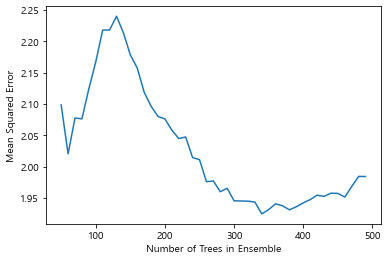

In [ ]:
import matplotlib.pyplot as plot

plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()


c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.9843220481049446


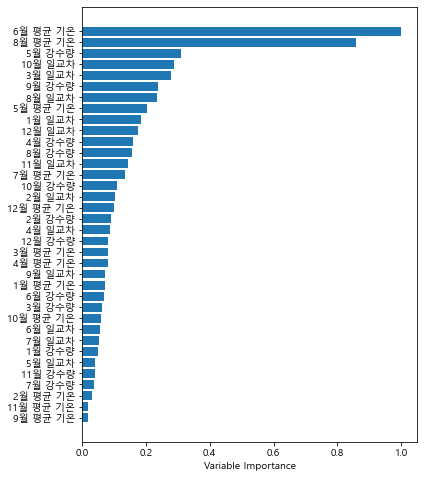

In [ ]:
import platform
import matplotlib

print(platform.system()) # 플랫폼 확인

# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')
    
regr = RandomForestRegressor(max_depth=4, random_state=531,
                          n_estimators=150)
regr.fit(X_train, y_train)
prediction = rfr.predict(X_test)
print(mean_squared_error(y_test, prediction))
featureImportance = regr.feature_importances_

col_n = np.array(data.columns.tolist()[6:-13])
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.figure(figsize=(6,8))
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, col_n[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()

#유의미한 변수만 뽑아서 당도데이터로 학습 -> 경북데이터로 예측하기

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('C:/Users/momo8/바탕 화면/공모전/사과 당도 및 기후.csv', encoding='cp949')

A_Q1 = data['당도'].quantile(0.25)#1분위수
A_Q2 = data['당도'].quantile(0.50)#2분위수(중앙값)
A_Q3 = data['당도'].quantile(0.75)
A_Q4 = data['당도'].quantile(1)

def q(df):
    if df['당도']<A_Q1:
        d=0
    elif df['당도']<A_Q2:
        d=1
    elif df['당도']<A_Q3:
        d=2
    else:
        d=3
    return d
data['당도_범주']=data.apply(q,axis=1)

data=data[['당도_범주','6월 평균 기온', '8월 평균 기온', '5월 강수량', '10월 일교차', '3월 일교차', '9월 강수량','8월 일교차']]#평균기온, 강수량 일교차를 넣어보자
data.head()

,당도_범주,6월 평균 기온,8월 평균 기온,5월 강수량,10월 일교차,3월 일교차,9월 강수량,8월 일교차
0,2,21.7,25.5,44.0,10.6,11.9,40.0,8.6
1,3,22.4,27.1,101.5,8.4,11.1,141.0,8.5
2,2,21.7,25.8,81.5,9.7,11.4,99.0,7.7
3,1,22.4,25.1,32.2,11.8,13.6,62.4,8.3
4,3,21.7,24.3,18.0,14.0,15.2,24.5,8.7


In [ ]:
X=data[['6월 평균 기온', '8월 평균 기온', '5월 강수량', '10월 일교차', '3월 일교차', '9월 강수량','8월 일교차']]
X=X.apply(pd.to_numeric)
y=data[['당도_범주']]
y=y.apply(pd.to_numeric) #일단 숫자형으로 바꾸기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

rand_clf = RandomForestClassifier(bootstrap=True,
                                  max_depth = 10,
                                  max_features = 'log2',
                                  min_samples_leaf = 3,
                                  min_samples_split = 5,
                                  n_estimators = 100)
rand_clf.fit(X_train, y_train.values.ravel())


pred=rand_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.625

In [169]:
#경북지역 예측하기
gb=pd.read_csv('C:/Users/momo8/바탕 화면/공모전/data.csv')
gb=gb[['6월 평균기온', '8월 평균기온', '5월 평균강수량', '10월 일교차', '3월 일교차', '9월 평균강수량','8월 일교차','지점명']]
gb_X=gb[['6월 평균기온', '8월 평균기온', '5월 평균강수량', '10월 일교차', '3월 일교차', '9월 평균강수량','8월 일교차']] 
gb_X.columns=['6월 평균 기온', '8월 평균 기온', '5월 강수량', '10월 일교차', '3월 일교차', '9월 강수량','8월 일교차'] #내가 학습시킨 데이터 변수명으로 바꿔주기
gb_X=gb_X.apply(pd.to_numeric)

In [ ]:
pred_gb=rand_clf.predict(gb_X)
gb['당도_예측']=pred_gb
gb

c:\Users\momo8\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,6월 평균기온,8월 평균기온,5월 평균강수량,10월 일교차,3월 일교차,9월 평균강수량,8월 일교차,지점명,당도_예측
0,19.4,24.4,35.9,6.2,6.8,73.2,5.4,울릉도,1
1,20.7,23.7,56.2,11.3,14.7,97.9,11.9,봉화,0
2,21.3,24.0,17.7,11.4,14.6,99.5,8.8,예천,1
3,22.3,26.6,69.3,12.8,13.3,121.6,10.0,경주,1
4,22.2,26.2,50.0,11.9,15.8,241.0,10.1,성주,0
...,...,...,...,...,...,...,...,...,...
156,22.6,25.6,20.5,11.6,15.7,115.5,10.3,고령,1
157,23.4,27.7,109.1,11.0,12.8,129.5,9.9,구미,1
158,19.6,24.5,42.5,11.7,14.7,148.0,10.0,영양,0
159,24.1,28.5,35.5,12.4,12.5,232.0,8.9,경산,1


In [ ]:
df=gb.groupby(['지점명'], as_index=False)['당도_예측'].mean()
df

,지점명,당도_예측
0,경산,0.714286
1,경주,0.571429
2,고령,0.285714
3,구미,0.857143
4,군위,0.285714
5,김천,0.142857
6,문경,0.428571
7,봉화,0.142857
8,상주,0.714286
9,성주,0.428571


In [ ]:
#eda
A_Q1 = df['당도_예측'].quantile(0.25)#1분위수
A_Q2 = df['당도_예측'].quantile(0.50)#2분위수(중앙값)
A_Q3 = df['당도_예측'].quantile(0.75)
A_Q4 = df['당도_예측'].quantile(1)

def q(df):
    if df['당도_예측']<A_Q1:
        d=0
    elif df['당도_예측']<A_Q2:
        d=0
    elif df['당도_예측']<A_Q3:
        d=1
    else:
        d=1
    return d
df['당도_범주']=df.apply(q,axis=1)
df

,지점명,당도_예측,당도_범주
0,경산,1.0,1
1,경주,1.0,1
2,고령,0.0,1
3,구미,1.0,1
4,군위,0.0,1
5,김천,0.0,1
6,문경,0.0,1
7,봉화,0.0,1
8,상주,1.0,1
9,성주,0.0,1


In [ ]:
df['당도_예측']=df['당도_예측'].round(0)
df

,지점명,당도_예측,당도_범주
0,경산,1.0,1
1,경주,1.0,1
2,고령,0.0,0
3,구미,1.0,1
4,군위,0.0,0
5,김천,0.0,0
6,문경,0.0,1
7,봉화,0.0,0
8,상주,1.0,1
9,성주,0.0,1


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)
test_features = scaler.transform(X_test)


model = LogisticRegression()
model.fit(train_features, y_train.values.ravel())

pred_l=model.predict(test_features)
accuracy_l = accuracy_score(y_test, pred_l)
accuracy_l

0.625

In [ ]:
model.score(test_features ,y_test)

0.625

In [192]:
# 배깅해보기
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)
test_features = scaler.transform(X_test)

# oob_score : 부스트래핑에 포함되지 않는 샘플을 기반으로 훈련된 모델을 평가
model = BaggingClassifier(LogisticRegression(solver='liblinear',max_iter=1000), n_estimators=100,oob_score=True,n_jobs=1,random_state=42)

model.fit(train_features, y_train.values.ravel())

# 평가
print("훈련 세트 정확도 : {:.3f}".format(model.score(train_features, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(test_features, y_test)))
print("OOB 샘플의 정확도 : {:.3f}".format(model.oob_score_))

훈련 세트 정확도 : 0.760
테스트 세트 정확도 : 0.500
OOB 샘플의 정확도 : 0.560


In [193]:
#경북지역 예측하기
gb=pd.read_csv('C:/Users/momo8/바탕 화면/공모전/data.csv')
gb=gb[['6월 평균기온', '8월 평균기온', '5월 평균강수량', '10월 일교차', '3월 일교차', '9월 평균강수량','8월 일교차','지점명']]
gb_X=gb[['6월 평균기온', '8월 평균기온', '5월 평균강수량', '10월 일교차', '3월 일교차', '9월 평균강수량','8월 일교차']] 
gb_X.columns=['6월 평균 기온', '8월 평균 기온', '5월 강수량', '10월 일교차', '3월 일교차', '9월 강수량','8월 일교차'] #내가 학습시킨 데이터 변수명으로 바꿔주기
gb_X=gb_X.apply(pd.to_numeric)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

gb_X = scaler.fit_transform(gb_X)

pred_gb=model.predict(gb_X)
gb['당도_예측']=pred_gb
gb

,6월 평균기온,8월 평균기온,5월 평균강수량,10월 일교차,3월 일교차,9월 평균강수량,8월 일교차,지점명,당도_예측
0,19.4,24.4,35.9,6.2,6.8,73.2,5.4,울릉도,1
1,20.7,23.7,56.2,11.3,14.7,97.9,11.9,봉화,0
2,21.3,24.0,17.7,11.4,14.6,99.5,8.8,예천,0
3,22.3,26.6,69.3,12.8,13.3,121.6,10.0,경주,0
4,22.2,26.2,50.0,11.9,15.8,241.0,10.1,성주,0
...,...,...,...,...,...,...,...,...,...
156,22.6,25.6,20.5,11.6,15.7,115.5,10.3,고령,0
157,23.4,27.7,109.1,11.0,12.8,129.5,9.9,구미,1
158,19.6,24.5,42.5,11.7,14.7,148.0,10.0,영양,0
159,24.1,28.5,35.5,12.4,12.5,232.0,8.9,경산,0


In [197]:
df=gb.groupby(['지점명'], as_index=False)['당도_예측'].mean()
#eda
A_Q1 = df['당도_예측'].quantile(0.25)#1분위수
A_Q2 = df['당도_예측'].quantile(0.50)#2분위수(중앙값)
A_Q3 = df['당도_예측'].quantile(0.75)
A_Q4 = df['당도_예측'].quantile(1)
m=df['당도'].median
def q(df):
    if df['당도_예측']<A_Q1:
        d=0
    elif df['당도_예측']<A_Q2:
        d=0
    elif df['당도_예측']<A_Q3:
        d=1
    else:
        d=1
    return d
df['당도_범주']=df.apply(q,axis=1)
df

,지점명,당도_예측,당도_범주
0,경산,0.428571,1
1,경주,0.000000,1
2,고령,0.000000,1
3,구미,0.571429,1
4,군위,0.000000,1
5,김천,0.000000,1
6,문경,0.142857,1
7,봉화,0.000000,1
8,상주,0.428571,1
9,성주,0.000000,1


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400, random_state = 123)

evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
pred_lgbm = lgbm.predict(X_test)

accuracy_score(y_test, pred_lgbm)